In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


machine learning classification problem using heart disease dataset 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [5]:
#read data 

In [6]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

# Exploratory Data Analysis (EDA)

statistical data analysis 

In [7]:
df.head() # shows the first 5 rows of the data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape # gives you a feel of the data as to how many rows and columns there are. 

(303, 14)

In [9]:
df.isnull().sum() #  shows the sum of missin gvalues in each column 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe() # this line gives a statistical description of the dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.duplicated().sum()  #checking for duplicates 

1

In [12]:
df.drop_duplicates(inplace=True) # drops the duplicates 

In [13]:
df.shape # confirm the duplicate has been dropped 

(302, 14)

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data features
Age- patient's age sex- patient's gender cp- patient's CP Level trestbps- patient's Trest BPS Level chol- patient's cholesterol level fbs- patient's FBS Level restecg- patient's Resting ECG Levels thalach- patients Thalach levels exang- patient's exang levels oldpeak-patient's old peak history recorded slope- patient's slope levels ca- patient's CA levels thal- patient's thal levels target- 0=healthy individual, 1= heart-disease patient

In [16]:
df.nunique().sort_values() # shows th number of unique values and sorts it in ascending order 

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

Graphical Data Analysis 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

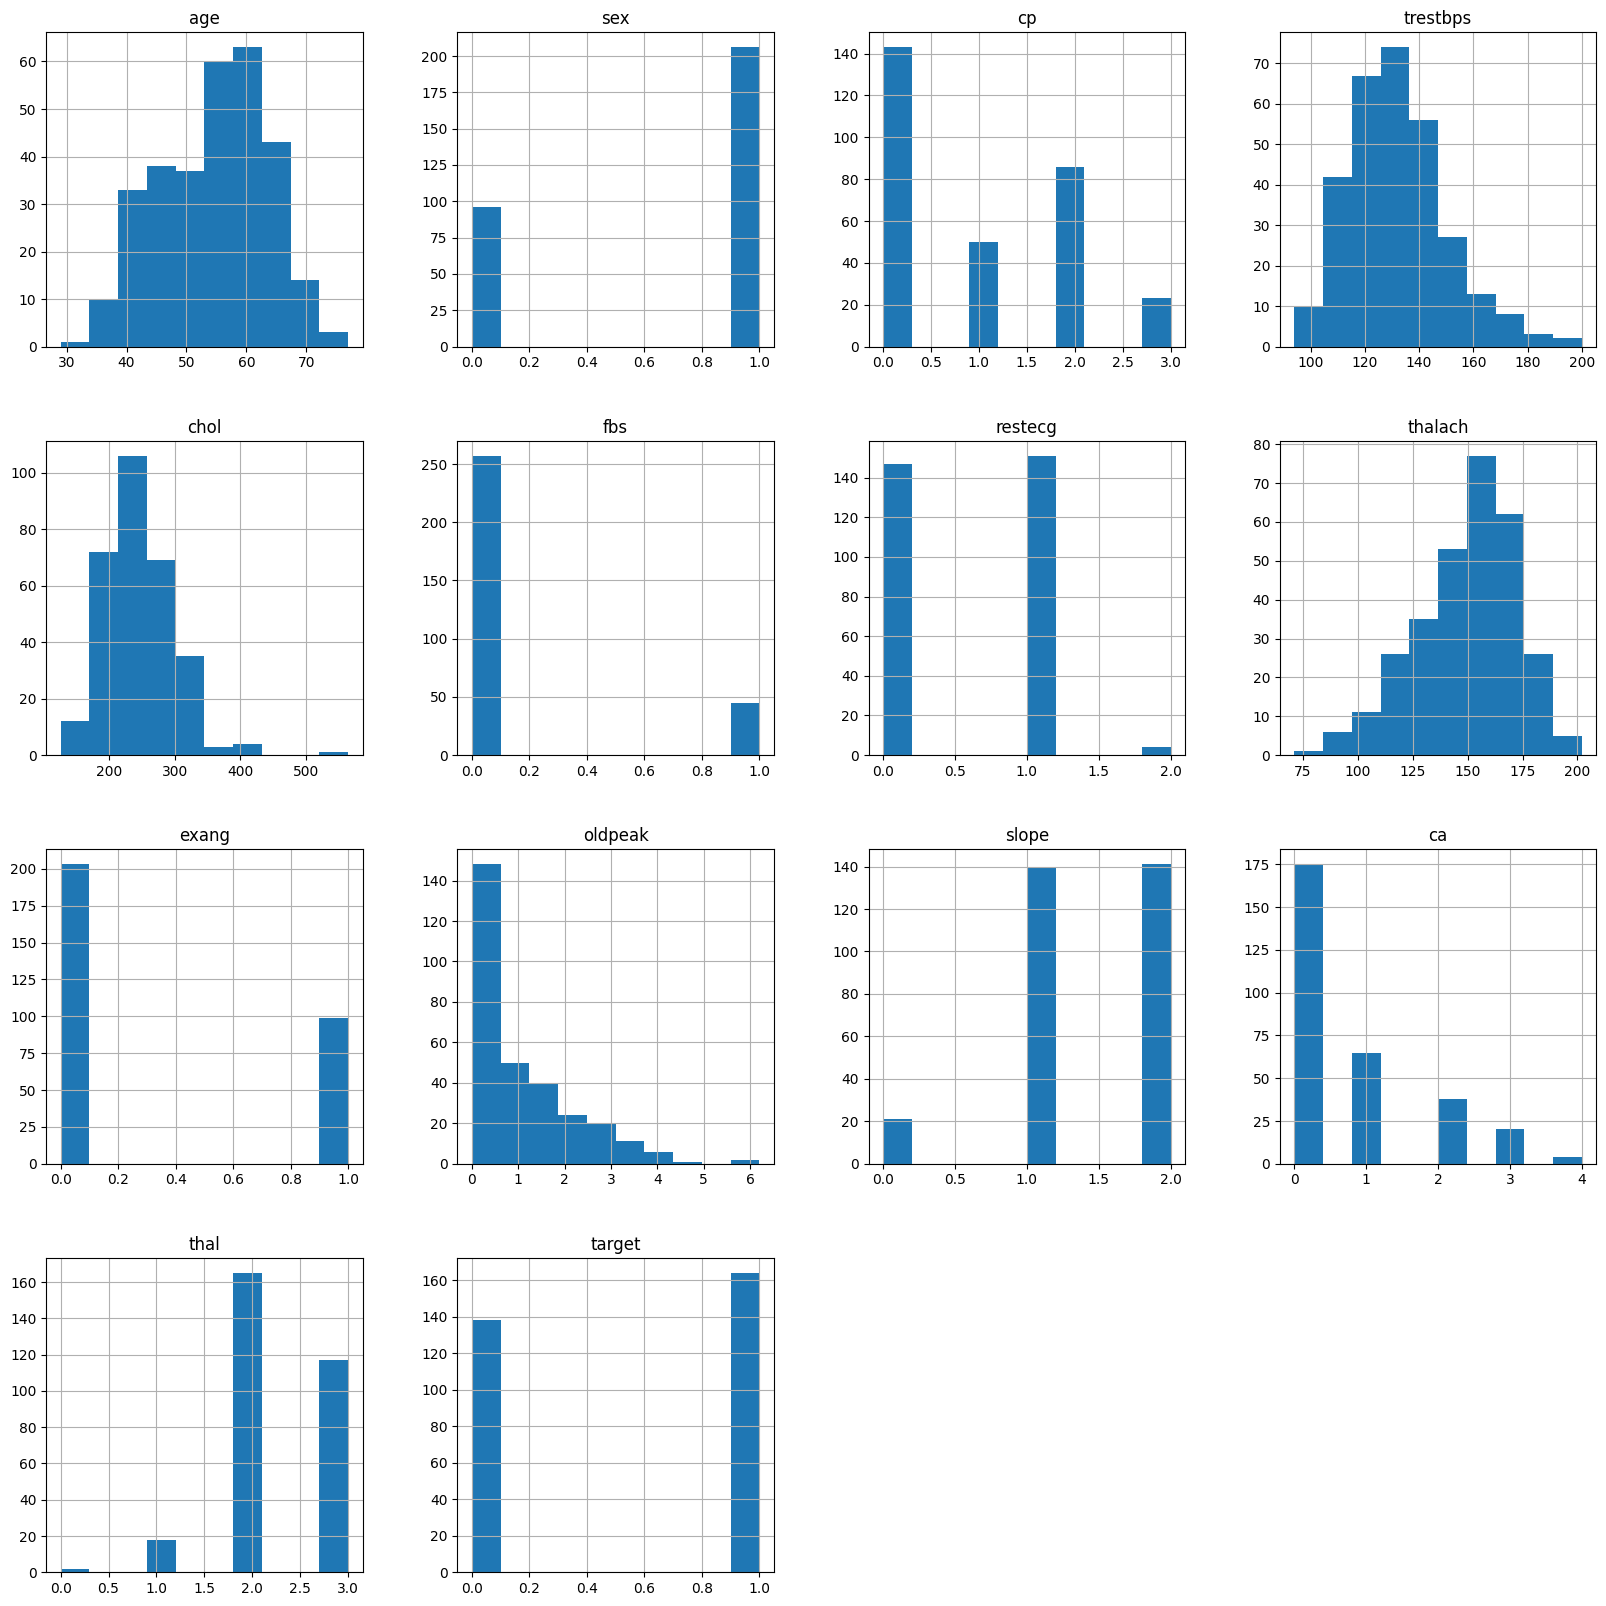

In [17]:
df.hist(figsize=(20,20))      #This method generates histograms for each numeric column in the DataFrame. Each histogram shows the distribution of the values in that column.

In [18]:
from sklearn.preprocessing import StandardScaler 
my_scaler= StandardScaler()
df_scaler_SD = my_scaler.fit_transform(df)   #This is used to scale the features so that they have a mean of 0 and a standard deviation of 1. 

In [19]:
df_scaler_SD.min(),df_scaler_SD.max()

(-3.7819160831094725, 6.145034461975383)

In [20]:
X = df.iloc[:,[1,3]].values
y = df.iloc[:,-1].values 

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y) #split the dataset into training and testing data with a test size of 20%

In [22]:
from sklearn.linear_model import LogisticRegression # logistic regresssion model imported 

In [23]:
LR = LogisticRegression()
LR.fit(X_train,y_train) # fit the model to the training data 

LogisticRegression()

Measure Accuracy 

In [24]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [25]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
}

In [26]:
from tqdm import tqdm 
# fit models, predict and calculate accuracy and F1 score 
results= []
models_name = []
for name, model in tqdm (models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average = 'weighted')
    models_name.append(name)
    results.append([accuracy,precision,recall,f1])

100%|██████████| 5/5 [00:00<00:00, 22.77it/s]


In [27]:
import pandas as pd 
Model_accuracy = pd.DataFrame(results,index=models_name,columns=['Accuracy','Precision','Recall','F1 Score'])

In [28]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.508197,0.531780,0.508197,0.491173
RandomForestClassifier,0.491803,0.495822,0.491803,0.492624
KNeighborsClassifier,0.442623,0.452693,0.442623,0.429872
DecisionTreeClassifier,0.524590,0.531687,0.524590,0.524590
GaussianNB,0.491803,0.523992,0.491803,0.453454


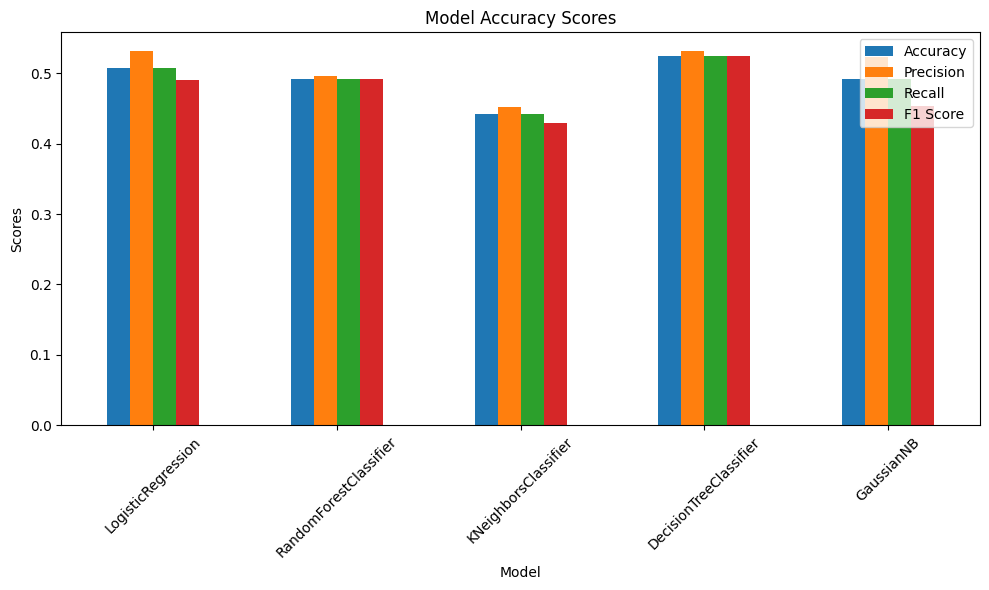

In [29]:
Model_accuracy.plot(kind='bar', figsize=(10,6))
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) #rotate moddelnames for better readability 
plt.legend(loc='upper right')
plt.tight_layout() #adjust layout to fit labels 

# Dislay the plot 
plt.show()

# support vector machines (SVM)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.svm import SVC

In [31]:
# Initialize the classifier with a linear kernel and regularization parameter C=0.001
classifier = SVC(kernel='linear', random_state = 0,C=.001)
# Train the model on the training data
classifier.fit(X_train, y_train)
# Evaluate the model on the training data
acc_train =classifier.score(X_train,y_train)
print(acc_train)
# Make predictions on the test data
y_pred = classifier.predict(X_test)
# Calculate accuracy on the test data
acc_test = accuracy_score(y_test, y_pred)
print(acc_test) 

0.5684647302904564
0.5573770491803278


In [32]:

classifier = SVC(kernel='rbf',random_state = 0,C=.001)
classifier.fit(X_train, y_train)
# accuracy on the training set 
acc_train = classifier.score(X_train, y_train)
print(acc_test)
# make predictions and compute test accuracy 
y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.5573770491803278
0.5409836065573771


In [33]:
# initialize the classifier 
classifier = SVC(kernel ='sigmoid', gamma=.02,random_state = 0,C=1)
classifier.fit(X_train,y_train)
# training accuracy 
acc_train = classifier.score(X_train,y_train)
print(acc_train)

# predictions on the test set 
y_pred = classifier.predict(X_test)

# test accuracy 
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

#additional evaluation metrics 
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.5435684647302904
0.5409836065573771
0.7021276595744682
0.5409836065573771
1.0


# Clustering 

In [34]:
from sklearn.cluster import KMeans 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

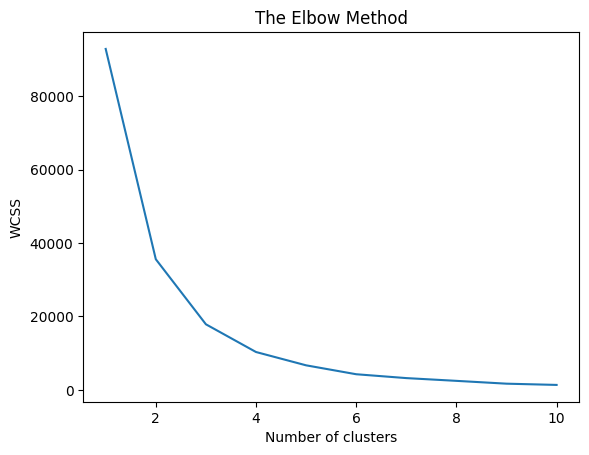

In [35]:
# calculating WCSS (within - cluster sum of squares )
wcss= []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# plotting the elbow method graph 
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [36]:
from sklearn.metrics import silhouette_score
#from sklearn.metrics import silhouette_samples,silhouette_score 
score = silhouette_score(X, y)
print(score) 

0.01284892917216031


For n_clusters = 2 The average silhouette_score is : 0.5632660319754542
For n_clusters = 3 The average silhouette_score is : 0.5579546538392276
For n_clusters = 4 The average silhouette_score is : 0.5793873327204474
For n_clusters = 5 The average silhouette_score is : 0.576821742133658
For n_clusters = 6 The average silhouette_score is : 0.6305578527757791
For n_clusters = 7 The average silhouette_score is : 0.6419126281458051
For n_clusters = 8 The average silhouette_score is : 0.6545313939552144


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 9 The average silhouette_score is : 0.6619191246557923


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.6614611604796081


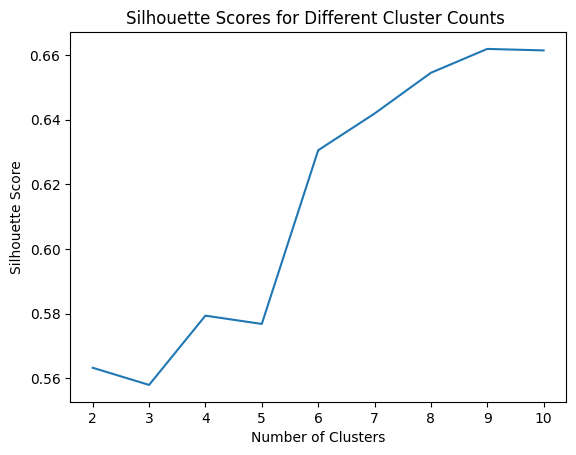

Idea values of clusters: 9


In [37]:
# calculating silhouette scores for different numbers of clusters 
silh = []
for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silh.append(silhouette_avg)
    print('For n_clusters =',i,'The average silhouette_score is :', silhouette_avg)
#plotting the silhouette scores     
plt.plot(range(2, 11), silh)
plt.title('Silhouette Scores for Different Cluster Counts ')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# finding thr ideal number of clusters 
print('Idea values of clusters:', silh.index(max(silh))+2)

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state= 0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans ==0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans ==1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans ==2, 1], s = 100, c ='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans ==3, 1], s = 100, c ='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans ==4, 1], s = 100, c ='magenta', label = 'Cluster 5')

#plotting the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

#adding titles and labels 
plt.title('Clusters of Heart Disease Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending Score (1-100)')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from scipy import stats
import statistics 
from skklearn.cluster import KMeans 
from sklearn.model_selection import GridSearchCV 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 

#performing Agglomerative Clustering 
agg_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agg_cluster.fit(X)

#plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Heart Disease Dendrograms')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y= 160, color= 'r', linestyle='--')  # threshold line 
plt.show()

In [ ]:
# END...

In [40]:
!git config --global user.name "xo-la"
!git config --global user.email "adefehintioluwole6@gmail.com"


In [41]:
!git init

Reinitialized existing Git repository in /kaggle/working/.git/


In [43]:
!git add machine learning classification problem .ipynb

fatal: pathspec 'machine' did not match any files
